Importing required libraries

In [2]:
import pandas as pd
import numpy as np
import math as m
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,accuracy_score

In [3]:
data = pd.read_csv('/content/Company_Data (1).csv')
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


EDA

In [4]:
data.shape

(400, 11)

In [5]:
data.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

In [6]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [8]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


Converting the target column(Sales) into categoric column

In [9]:
sales=pd.cut(np.array(data["Sales"].values),3, labels=["Low", "Medium", "High"])
data["sales"]=sales
data.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Medium
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,Medium
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes,Medium
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No,Medium
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes,High
8,6.54,132,110,0,108,124,Medium,76,10,No,No,Medium
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes,Low


In [10]:
cols=['ShelveLoc','Urban', 'US','Sales']
from sklearn.preprocessing import LabelEncoder
data[cols]=data[cols].apply(LabelEncoder().fit_transform)
data.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,255,138,73,11,276,120,0,42,17,1,1,Medium
1,297,111,48,16,260,83,1,65,10,1,1,High
2,267,113,35,10,269,80,2,59,12,1,1,Medium
3,158,117,100,4,466,97,2,55,14,1,1,Medium
4,37,141,64,3,340,128,0,38,13,1,0,Low
5,290,124,113,13,501,72,0,78,16,0,1,Medium
6,133,115,105,0,45,108,2,71,15,1,0,Medium
7,306,136,81,15,425,120,1,67,10,1,1,High
8,129,132,110,0,108,124,2,76,10,0,0,Medium
9,55,132,113,0,131,124,2,76,17,0,1,Low


OUtlier Detection

<Axes: >

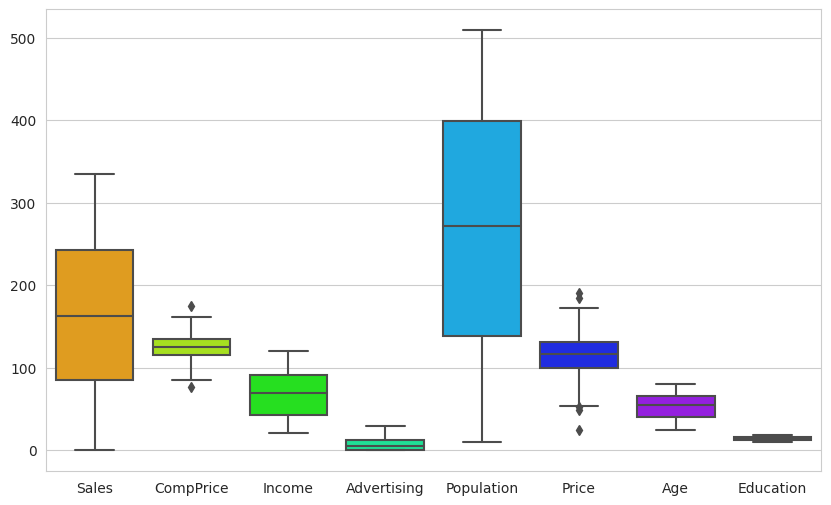

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data.loc[:,['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education']],palette="hsv")

In [12]:
print(data["Sales"].mean())
print(data["Sales"].skew())

165.225
0.056848419636136724


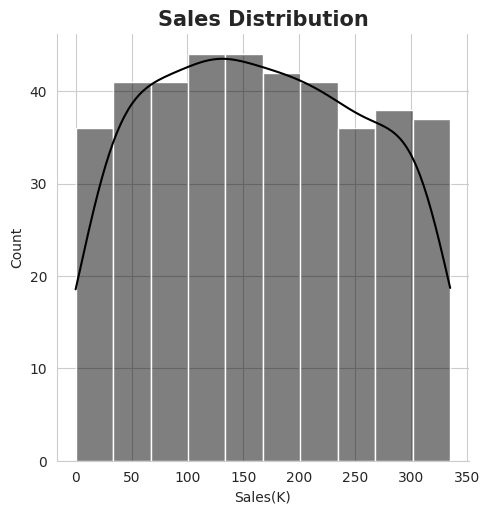

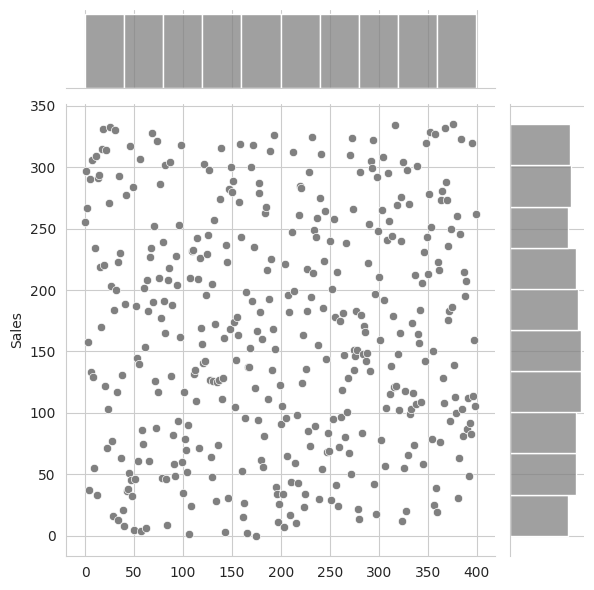

In [14]:
sns.displot(data=data['Sales'],color="black",kde=True)
plt.title("Sales Distribution",fontweight="bold",fontsize=15)
plt.xlabel("Sales(K)")
sns.jointplot(data=data['Sales'],color="gray")

Text(0.5, 1.0, 'Countplot of sales')

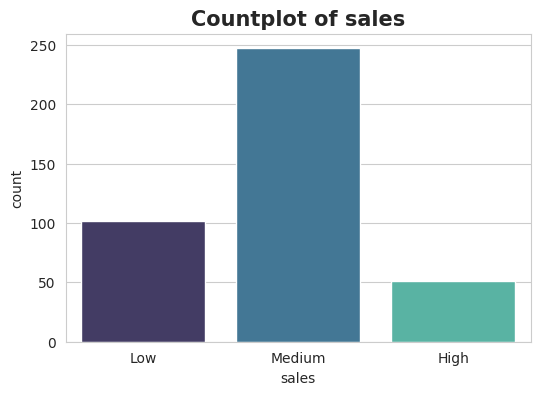

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(x=data['sales'],palette="mako")
plt.title("Countplot of sales",fontweight="bold",fontsize=15)

Mean income level 68.6575


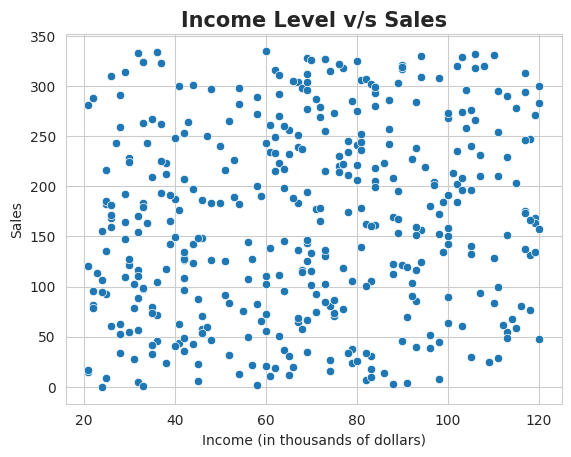

In [17]:
sns.scatterplot(x="Income",y="Sales",data=data)
plt.xlabel("Income (in thousands of dollars)")
plt.title("Income Level v/s Sales",fontweight="bold",fontsize=15)
print("Mean income level",data['Income'].mean())

Text(0.5, 1.0, 'Advertising v/s Sales')

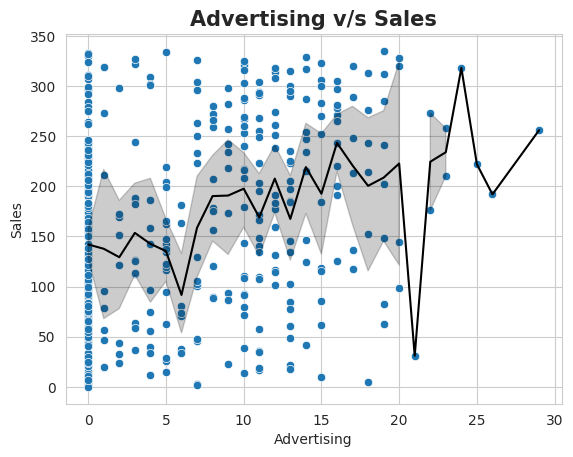

In [19]:
sns.scatterplot(x="Advertising",y="Sales",data=data)
sns.lineplot(x="Advertising",y="Sales",data=data,color="black")
plt.title("Advertising v/s Sales",fontweight="bold",fontsize=15)

Text(0.5, 1.0, 'Shelving location V/S Sales')

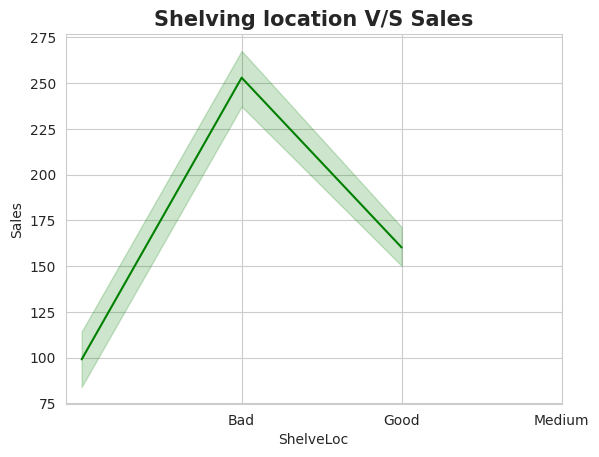

In [20]:
sns.lineplot(x="ShelveLoc",y="Sales",data=data,color="green")
plt.xticks((1,2,3), ["Bad","Good","Medium"], rotation ='horizontal')
plt.title("Shelving location V/S Sales",fontweight="bold",fontsize=15)

In [23]:
print(data["Urban"].value_counts())

1    282
0    118
Name: Urban, dtype: int64


Text(0.5, 1.0, 'Store Location')

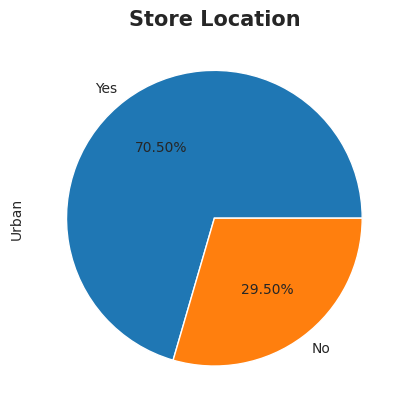

In [21]:
data["Urban"].value_counts().plot(kind="pie",autopct='%.2f%%',labels=["Yes","No"])
plt.title("Store Location",fontweight="bold",fontsize=15)

In [25]:
print(data["US"].value_counts())

1    258
0    142
Name: US, dtype: int64


Text(0.5, 1.0, 'US Location')

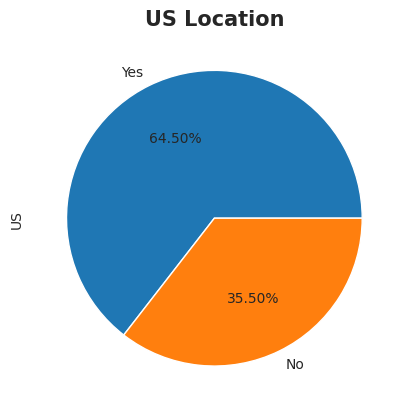

In [24]:
data["US"].value_counts().plot(kind="pie",autopct='%.2f%%',labels=["Yes","No"])
plt.title("US Location",fontweight="bold",fontsize=15)

Text(0.5, 0, 'Urban v/s Rural')

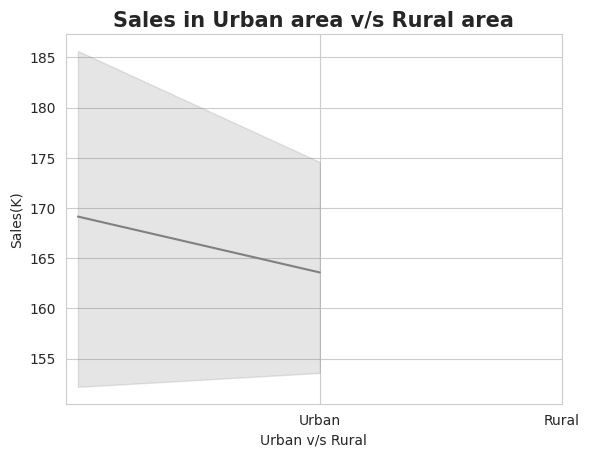

In [26]:
sns.lineplot(x="Urban",y="Sales",data=data,color="gray")
plt.title("Sales in Urban area v/s Rural area",fontweight="bold",fontsize=15)
plt.xticks((1,2), ["Urban","Rural"], rotation ='horizontal')
plt.ylabel("Sales(K)")
plt.xlabel("Urban v/s Rural")

Text(0.5, 0, 'US v/s Outside')

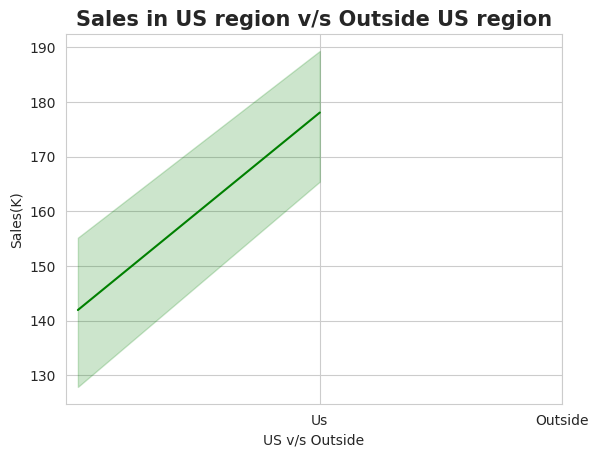

In [27]:
sns.lineplot(x="US",y="Sales",data=data,color="green")
plt.title("Sales in US region v/s Outside US region",fontweight="bold",fontsize=15)
plt.xticks((1,2), ["Us","Outside"], rotation ='horizontal')
plt.ylabel("Sales(K)")
plt.xlabel("US v/s Outside")

In [29]:
data.corr()

<ipython-input-29-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
Sales,1.000000,0.059040,0.154353,0.288179,0.043045,-0.428046,0.167251,-0.233322,-0.031917,-0.026933,0.183155
CompPrice,0.059040,1.000000,-0.080653,-0.024199,-0.094707,0.584848,0.023350,-0.100239,0.025197,0.066594,0.016869
Income,0.154353,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.067678,-0.004670,-0.056855,0.037967,0.089601
Advertising,0.288179,-0.024199,0.058995,1.000000,0.265652,0.044537,0.008544,-0.004557,-0.033594,0.042035,0.684460
Population,0.043045,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.044772,-0.042663,-0.106378,-0.052025,0.060564
Price,-0.428046,0.584848,-0.056698,0.044537,-0.012144,1.000000,0.014633,-0.102177,0.011747,0.047016,0.057861
ShelveLoc,0.167251,0.023350,-0.067678,0.008544,-0.044772,0.014633,1.000000,0.056488,0.001492,-0.063978,-0.039760
Age,-0.233322,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,0.056488,1.000000,0.006488,0.028479,0.008652
Education,-0.031917,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.001492,0.006488,1.000000,-0.033094,-0.078250
Urban,-0.026933,0.066594,0.037967,0.042035,-0.052025,0.047016,-0.063978,0.028479,-0.033094,1.000000,0.047085


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [31]:
#splitting data into x & y
X=data.iloc[:,1:11]
Y=data.iloc[:,11]

In [32]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=123)

In [33]:
print("X_train", X_train.shape)
print("Y_train", Y_train.shape)
print("X_test", X_test.shape)
print("Y_test", Y_test.shape)

X_train (280, 10)
Y_train (280,)
X_test (120, 10)
Y_test (120,)


Building MOdel Using Gini Criterian

In [34]:
model=RandomForestClassifier(criterion="gini",max_depth=15)
model_train=model.fit(X_train,Y_train)

In [35]:
pred=model_train.predict(X_test)
pred

array(['Medium', 'High', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Low', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'High', 'Low', 'Medium', 'Medium',
       'Low', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'High', 'Medium',
       'Low', 'Low', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'High', 'Low',
       'Medium', 'High', 'Low', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'High', 'Medium', 'Medium', 'Medium', 'Medium',
       'High', 'Medium', 'Medium', 'Medium', 'Medium', 'High', 'Medium',
       'Low', 'Medium', 'Medium', 'Low', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'High', 'Medium', 'Low',
       'Medium', 'Medium', 'High', 'Medium', 'Medium', 'M

In [37]:
confusion_matrix(Y_test,pred)

array([[ 5,  0, 11],
       [ 0, 10, 12],
       [ 6,  6, 70]])

In [38]:
accuracy_score(Y_test,pred)

0.7083333333333334

In [41]:
classification_report(Y_test,pred)
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

        High       0.45      0.31      0.37        16
         Low       0.62      0.45      0.53        22
      Medium       0.75      0.85      0.80        82

    accuracy                           0.71       120
   macro avg       0.61      0.54      0.57       120
weighted avg       0.69      0.71      0.69       120



Building Model Using Entropy Criterian

In [43]:
model=RandomForestClassifier(criterion="entropy",max_depth=15)
model_train=model.fit(X_train,Y_train)
pred=model_train.predict(X_test)
pred

array(['Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Low', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Low', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Low', 'Low', 'Medium',
       'Low', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'High',
       'Low', 'Medium', 'High', 'Low', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'High', 'Medium', 'Medium', 'Medium', 'Low',
       'High', 'Medium', 'Low', 'Medium', 'Medium', 'Low', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'High',
       'Medium', 'Low', 'Medium', 'Medium', 'High', 'Medium', 'Medium',


In [44]:
confusion_matrix(Y_test,pred)

array([[ 5,  0, 11],
       [ 0, 11, 11],
       [ 2,  7, 73]])

In [45]:
accuracy_score(Y_test,pred)

0.7416666666666667

In [46]:
classification_report(Y_test,pred)
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

        High       0.71      0.31      0.43        16
         Low       0.61      0.50      0.55        22
      Medium       0.77      0.89      0.82        82

    accuracy                           0.74       120
   macro avg       0.70      0.57      0.60       120
weighted avg       0.73      0.74      0.72       120



Entropy model has higher accuracy than gini model

In [47]:
model_train.feature_importances_

array([0.10498807, 0.09955214, 0.08298902, 0.09549159, 0.21028874,
       0.18397979, 0.12788915, 0.06759225, 0.0111495 , 0.01607975])

<Axes: >

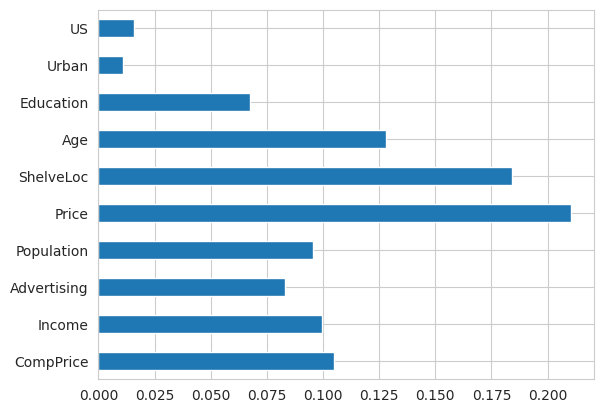

In [48]:
feat_impt=pd.Series(model_train.feature_importances_,index=X.columns)
feat_impt.plot(kind="barh")

Conclusion: Shelveloc,Price,Age,CompPrice are some top attributes contributing to the sales high.